In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [317]:
df = pd.read_csv(r"/content/instagram_reach.xls")

In [318]:
df

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...,...,...,...
95,8,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,9,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,10,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,11,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


In [319]:
df.shape

(100, 8)

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [321]:
df.duplicated().sum()

0

In [322]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["Time since posted"] = df["Time since posted"].astype(str).str.extract('(\d+)').astype(int)

print(df)
df["USERNAME"] = le.fit_transform(df["USERNAME"])
df["Caption"] = le.fit_transform(df["Caption"])
df["Hashtags"] = le.fit_transform(df["Hashtags"])
df

    Unnamed: 0  S.No              USERNAME  \
0            0     1         mikequindazzi   
1            1     2       drgorillapaints   
2            2     3    aitrading_official   
3            3     4  opensourcedworkplace   
4            4     5           crea.vision   
..         ...   ...                   ...   
95           8    19        michaelgarza__   
96           9    21           dvlp_search   
97          10    22            ecom.space   
98          11    24        lb3enterprises   
99          12    25          palmariusdev   

                                              Caption  Followers  \
0   Who are #DataScientist and what do they do? >>...       1600   
1   We all know where it’s going. We just have to ...        880   
2   Alexander Barinov: 4 years as CFO in multinati...        255   
3                                                sfad        340   
4   Ever missed a call while your phone was chargi...        304   
..                                     

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,64,86,1600,17,11,139
1,1,2,29,82,880,97,2,23
2,2,3,3,13,255,87,2,25
3,3,4,71,89,340,65,3,49
4,4,5,23,30,304,64,3,30
...,...,...,...,...,...,...,...,...
95,8,19,63,6,614,29,3,31
96,9,21,30,24,450,88,3,42
97,10,22,31,83,182,36,3,10
98,11,24,55,85,2039,62,3,222


<Axes: >

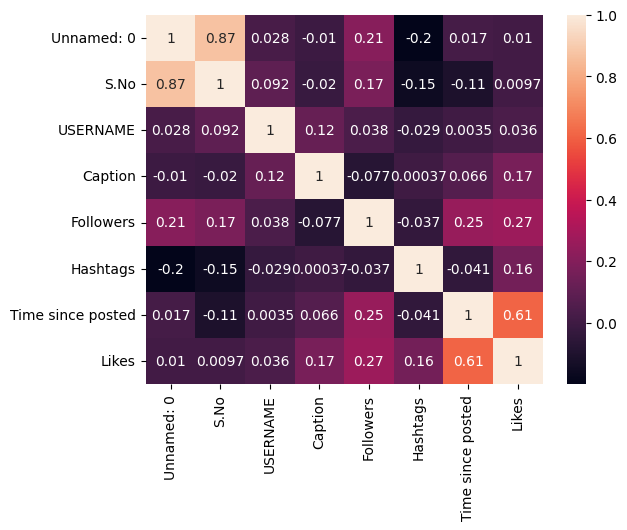

In [323]:
sns.heatmap(df.corr() , annot = True)

<Axes: xlabel='Likes', ylabel='Count'>

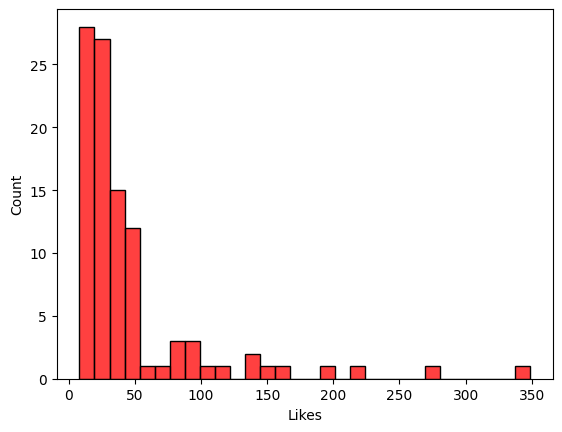

In [324]:
sns.histplot(df , x = "Likes" , color = "red")

<Axes: xlabel='Followers', ylabel='Count'>

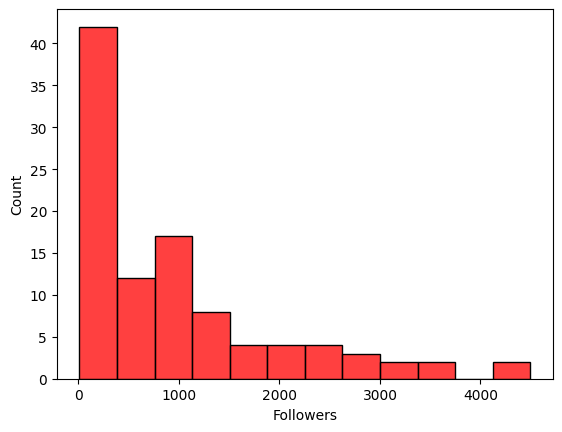

In [325]:
sns.histplot(df , x = "Followers" , color = "red")

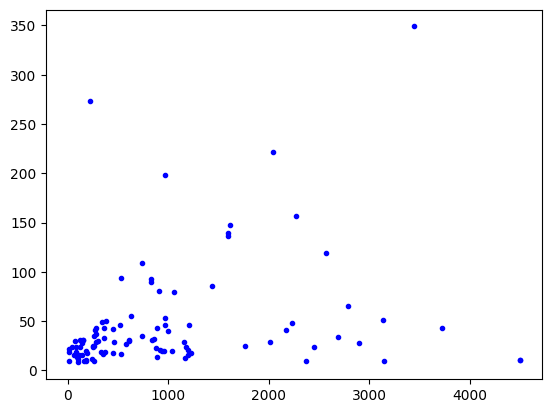

In [326]:
plt.scatter(df.Followers , df.Likes , marker = "." , c = "blue")

In [327]:
rate = (df["Likes"].sum() / df["Followers"].sum())*100
rate

4.831801738118009

In [328]:
X = df.drop(columns = "Likes")
Y = df["Likes"]

In [329]:
X

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted
0,0,1,64,86,1600,17,11
1,1,2,29,82,880,97,2
2,2,3,3,13,255,87,2
3,3,4,71,89,340,65,3
4,4,5,23,30,304,64,3
...,...,...,...,...,...,...,...
95,8,19,63,6,614,29,3
96,9,21,30,24,450,88,3
97,10,22,31,83,182,36,3
98,11,24,55,85,2039,62,3


In [330]:
Y

0     139
1      23
2      25
3      49
4      30
     ... 
95     31
96     42
97     10
98    222
99    109
Name: Likes, Length: 100, dtype: int64

In [331]:
from sklearn.model_selection import train_test_split

In [332]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , random_state = 2 , test_size = 0.2)

In [333]:
X_train

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted
35,8,20,50,19,1168,12,2
11,11,13,32,73,2232,21,8
84,11,22,74,75,361,73,3
44,5,13,49,20,118,38,2
73,0,5,17,41,2372,31,2
...,...,...,...,...,...,...,...
43,4,12,11,84,914,76,2
22,22,26,70,91,1041,50,2
72,10,25,53,94,955,75,2
15,15,20,52,43,971,58,3


In [334]:
X_test

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted
83,10,18,10,15,91,84,3
30,3,11,39,64,828,72,2
56,17,25,16,68,530,30,2
24,24,28,26,47,166,43,2
16,16,21,33,32,285,8,4
23,23,27,64,10,4496,6,2
2,2,3,3,13,255,87,2
27,0,5,88,46,1618,83,20
28,1,7,75,23,279,5,4
13,13,15,12,72,533,26,11


In [335]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

In [336]:
model1.fit(X_train , Y_train)

LinearRegression()

In [337]:
model1_predict = model1.predict(X_test)

In [338]:
model1_score = model1.score(X , Y)

In [339]:
model1_score

0.45021970620952856

In [373]:
df = df.drop(columns= "S.No")
X = df.drop(labels = ["Likes" , "Time since posted"], axis =1)
Y = df[["Likes" , "Time since posted"]]

In [374]:
X

,USERNAME,Caption,Followers,Hashtags
0,64,86,1600,17
1,29,82,880,97
2,3,13,255,87
3,71,89,340,65
4,23,30,304,64
...,...,...,...,...
95,63,6,614,29
96,30,24,450,88
97,31,83,182,36
98,55,85,2039,62


In [375]:
Y

,Likes,Time since posted
0,139,11
1,23,2
2,25,2
3,49,3
4,30,3
...,...,...
95,31,3
96,42,3
97,10,3
98,222,3


In [376]:
X_train , X_test , Y_train , Y_test  = train_test_split(X , Y , random_state = 2 , test_size = 0.2)

In [377]:
model2 = LinearRegression()

In [378]:
model2.fit(X , Y)

LinearRegression()

In [379]:
model2_p = model2.predict(X_train)

In [380]:
model2_score = model2.score(X , Y)

In [381]:
model2_score

0.10266059826142337

In [382]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [383]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

In [384]:
def evaluate_model(true, predict):
    r2=r2_score(true, predict)
    mae=mean_absolute_error(true,predict)
    mse=mean_squared_error(true,predict)


    return r2, mae,mse,

In [386]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
models={

    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'Randomforest':RandomForestRegressor()

}

In [387]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [388]:
def evaluate_model(true, predict):
    r2=r2_score(true, predict)
    mae=mean_absolute_error(true,predict)
    mse=mean_squared_error(true,predict)


    return r2, mae,mse,


In [390]:
for i in range(len(models)):
    model=list(models.values())[i]

    model.fit(X_train,Y_train)

    #make_prediction
    y_pred=model.predict(X_test)

    #this is for the validaiton
    R2,MAE,MSE=evaluate_model(Y_test,y_pred)


    print("model training performance",model)
    print("MSE:", MSE)
    print("MAE:",MAE)
    print("R2 SCORE:",R2)



    print("="*40)
    print("\n")


model training performance Lasso()
MSE: 850.058686177584
MAE: 17.333707844065774
R2 SCORE: 0.01475655318139013


model training performance Ridge()
MSE: 850.303938893597
MAE: 17.35613063906926
R2 SCORE: 0.011546787159038563


model training performance ElasticNet()
MSE: 850.2113657602692
MAE: 17.34427643540975
R2 SCORE: 0.013184885139911673


model training performance RandomForestRegressor()
MSE: 682.9280825000001
MAE: 14.592750000000002
R2 SCORE: 0.19738785115410318


